In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importiamo i csv con tutti i dati
driveStand = pd.read_csv('../dataSets/driver_standings.csv')
raceDet = pd.read_csv('../dataSets/race_details.csv')
quali = pd.read_csv('../dataSets/qualifyings.csv')

Top 10 piloti con più gare disputate

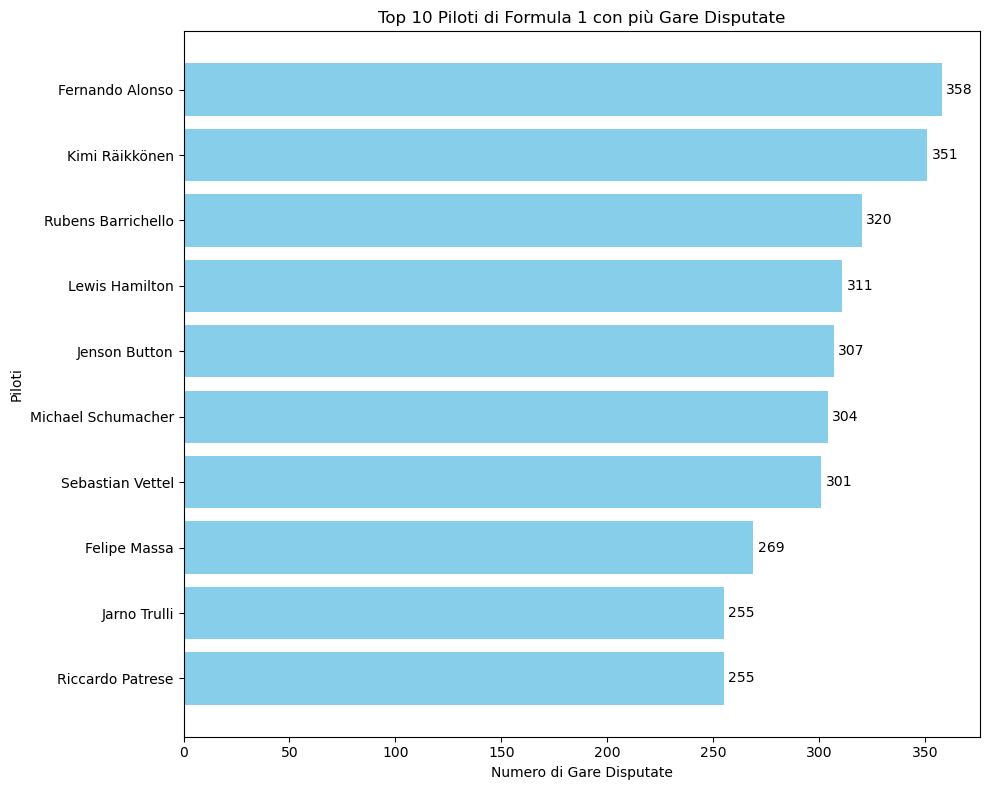

In [3]:
# Coneggioa del numero di gare disputate per ogni pilota
gare_per_pilota = raceDet['Driver'].value_counts()

# Seleziona i 10 piloti con più gare disputate
top_piloti = gare_per_pilota.nlargest(10)

# Configurazione del grafico
plt.figure(figsize=(10, 8))

# Creazione del diagramma a barre orizzontali
plt.barh(top_piloti.index, top_piloti.values, color='skyblue')

# Aggiunta dei valori al termine di ogni barra
for i in range(len(top_piloti)):
    plt.text(top_piloti.values[i] + 2, i, str(top_piloti.values[i]), va='center')

# Aggiunta delle etichette e del titolo
plt.xlabel('Numero di Gare Disputate')
plt.ylabel('Piloti')
plt.title('Top 10 Piloti di Formula 1 con più Gare Disputate')
plt.gca().invert_yaxis()  # Inversione l'asse Y per avere il pilota con più gare in cima

# Mostra il grafico
plt.tight_layout()
plt.show()

Top 10 piloti con più mondiali vinti

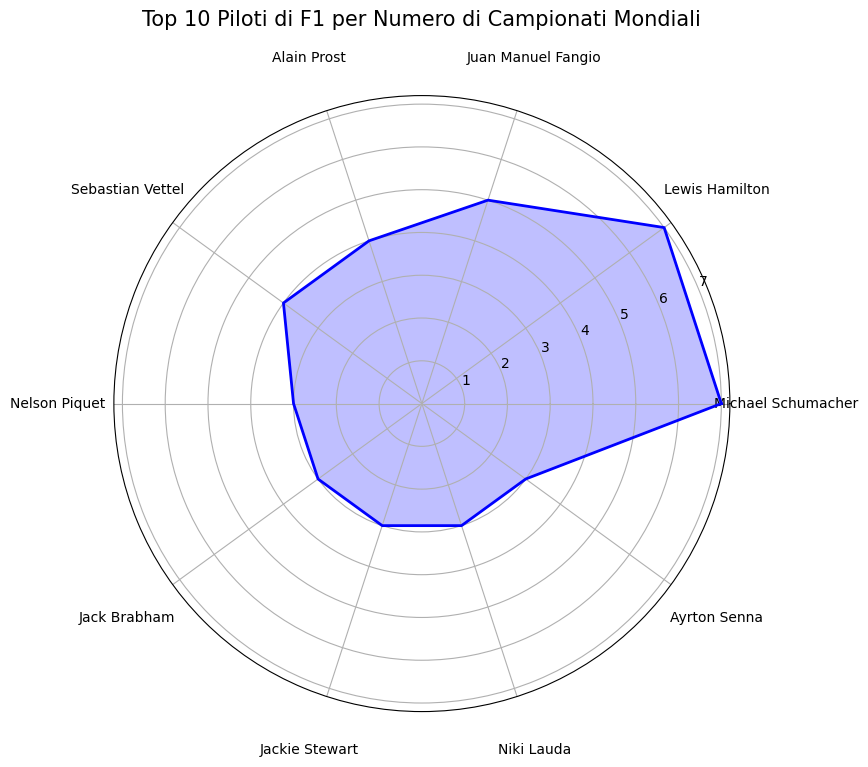

In [4]:
# Selezione del pilota con il maggior numero di punti per ogni anno
campioni = driveStand.loc[driveStand.groupby('Year')['PTS'].idxmax()]

# Conteggio del numero di campionati vinti da ciascun pilota
conteggio_Campionati = campioni['Driver'].value_counts()

# Selezione dei top 10 piloti
top_10_campioni = conteggio_Campionati.nlargest(10)

# Dati per il grafico polare
piloti = top_10_campioni.index
vittorie = top_10_campioni.values

# Angoli per il grafico polare
angoli = np.linspace(0, 2 * np.pi, len(piloti), endpoint=False).tolist()

vittorie = np.concatenate((vittorie, [vittorie[0]]))
angoli += angoli[:1]

# Creazione del grafico polare
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angoli, vittorie, color='blue', alpha=0.25)
ax.plot(angoli, vittorie, color='blue', linewidth=2)
ax.tick_params(pad=30)

# Etichette dei piloti
ax.set_xticks(angoli[:-1])  # Angoli per le etichette
ax.set_xticklabels(piloti)  # Etichette corrispondenti

# Titolo
plt.title('Top 10 Piloti di F1 per Numero di Campionati Mondiali', size=15, color='black', y=1.1)

plt.show()

Percentuale delle nazionalità dei piloti che hanno corso in Formula 1

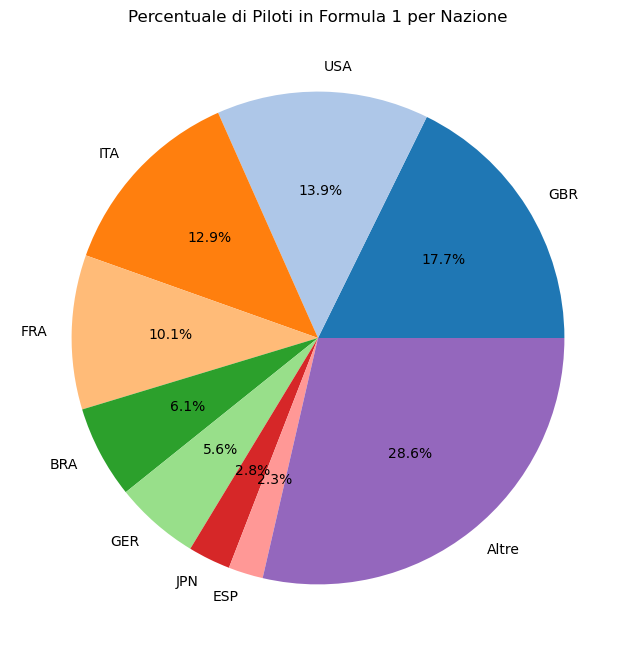

In [5]:
# Rimozione dei duplicati per avere solo un record per ogni pilota
piloti = driveStand[['Driver', 'Nationality']].drop_duplicates()

# Conteggio del numero di piloti per ciascuna nazione
num_Nazioni = piloti['Nationality'].value_counts()

# Calcolo della percentuale dei piloti per ciascuna nazione
perc_Nazioni = num_Nazioni / num_Nazioni.sum() * 100

# Selezione delle 6 nazioni con la percentuale più alta
top_6 = perc_Nazioni.nlargest(8)

# Calcolo della percentuale per tutte le altre nazioni
altre_Perc = perc_Nazioni.iloc[8:].sum()

# Aggiunta della sezione "Altre" al grafico
top_6['Altre'] = altre_Perc

# Creazione del grafico a torta
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_6, labels=top_6.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)

plt.title('Percentuale di Piloti in Formula 1 per Nazione')

plt.show()

Top 10 piloti più vincenti insieme alle gare che hanno disputato

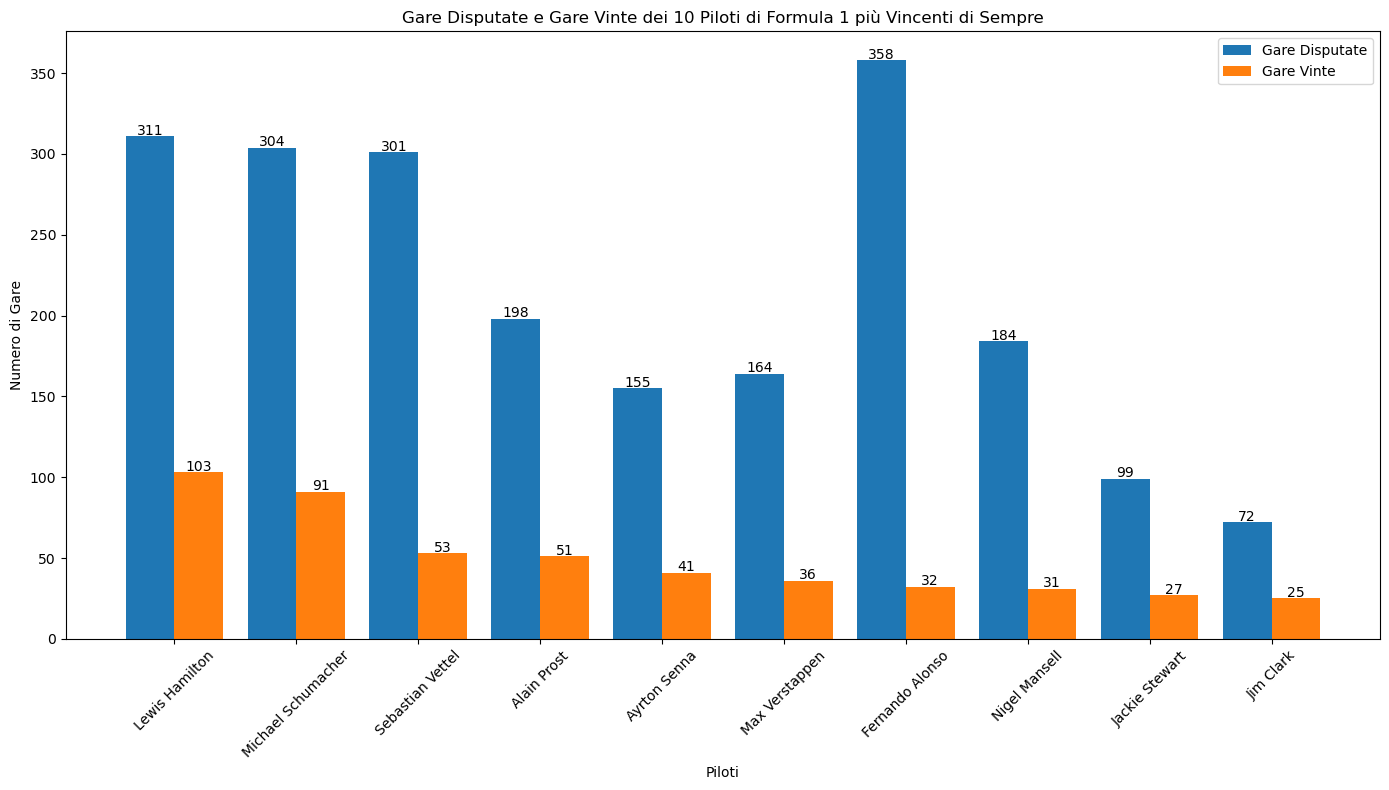

In [6]:
# Colonna Pos forzata a valori numerici
raceDet['Pos'] = pd.to_numeric(raceDet['Pos'], errors='coerce')

# Selezione delle gare vinte
df_vittorie = raceDet[raceDet['Pos'] == 1]

# Conteggio del numero di vittorie per ogni pilota
vittorie_per_pilota = df_vittorie['Driver'].value_counts()

# Conteggio del numero di gare disputate per ogni pilota
gare_per_pilota = raceDet['Driver'].value_counts()

# Creazione di un DataFrame unito con i dati di gare disputate e vinte
prestazioni_piloti = pd.DataFrame({
    'Gare Disputate': gare_per_pilota,
    'Gare Vinte': vittorie_per_pilota
}).fillna(0)

# Selezione top 10 piloti con più vittorie
top_piloti = prestazioni_piloti.nlargest(10, 'Gare Vinte')

# Configurazione del grafico
plt.figure(figsize=(14, 8))

# Impostazione delle posizioni per i piloti
x = np.arange(len(top_piloti))

# Larghezza delle barre
largh = 0.4

# Creazione delle barre per gare disputate e gare vinte
plt.bar(x - largh/2, top_piloti['Gare Disputate'], largh, label='Gare Disputate')
plt.bar(x + largh/2, top_piloti['Gare Vinte'], largh, label='Gare Vinte')

# Aggiunta dei valori in cima alle barre
for i in range(len(top_piloti)):
    plt.text(x[i] - largh/2, top_piloti['Gare Disputate'].iloc[i] + 1, int(top_piloti['Gare Disputate'].iloc[i]), ha='center')
    plt.text(x[i] + largh/2, top_piloti['Gare Vinte'].iloc[i] + 1, int(top_piloti['Gare Vinte'].iloc[i]), ha='center')

# Aggiunta etichette e titolo
plt.xlabel('Piloti')
plt.ylabel('Numero di Gare')
plt.title('Gare Disputate e Gare Vinte dei 10 Piloti di Formula 1 più Vincenti di Sempre')
plt.xticks(x, top_piloti.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Barre impilate con podi, pole position e vittorie per i 10 piloti più vincenti

<Figure size 2000x700 with 0 Axes>

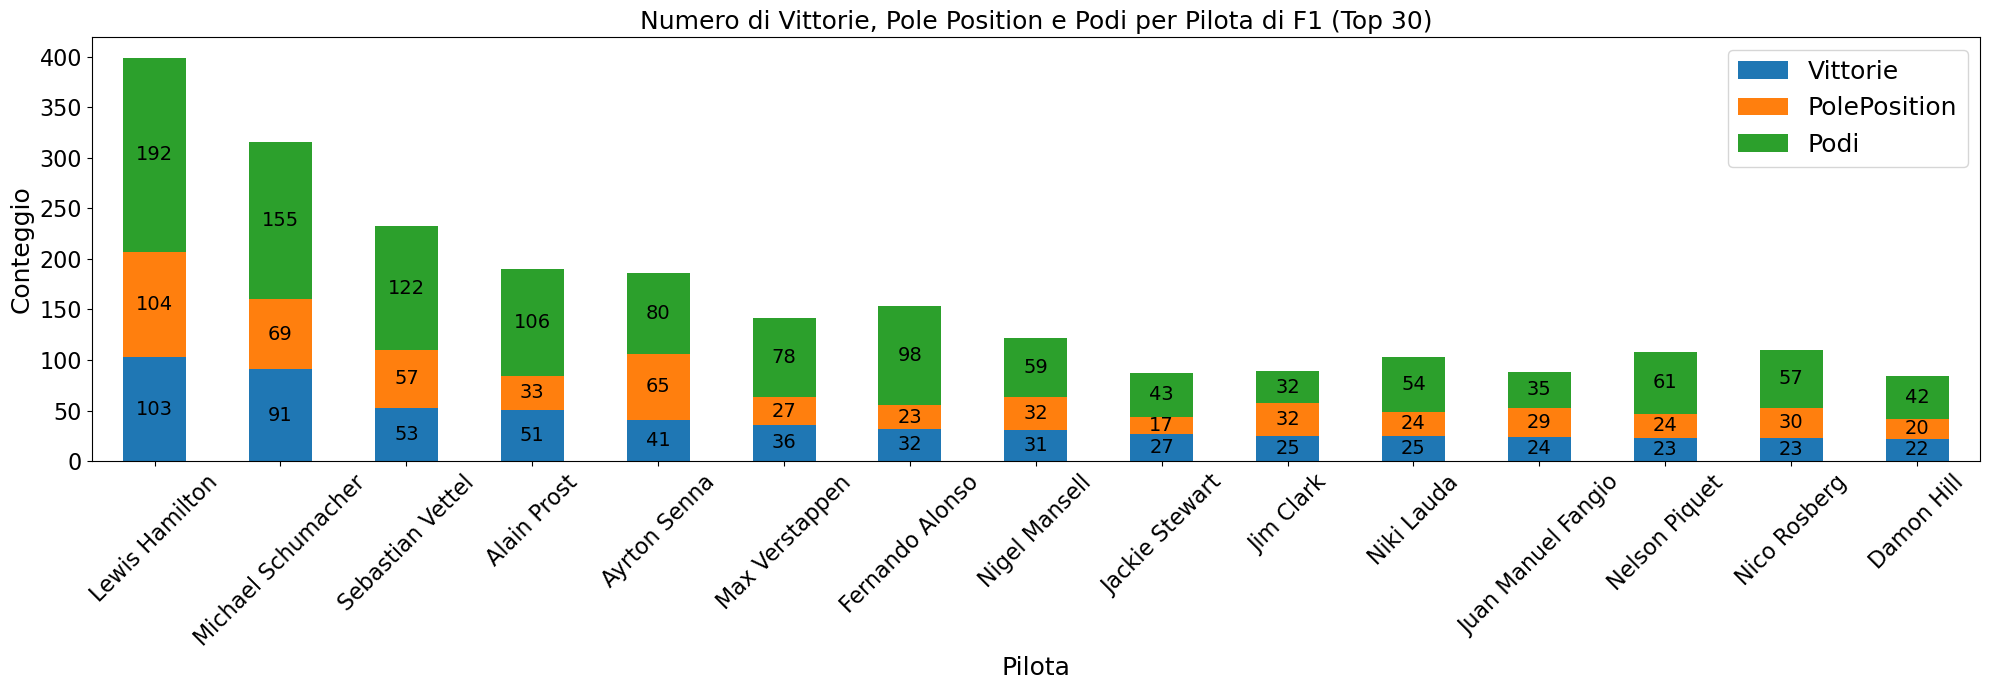

In [7]:
# Conversione di tutti i valori non numerici in 100
raceDet['Pos'] = pd.to_numeric(raceDet['Pos'], errors='coerce').fillna(100).astype(int)

# Calcoloa del numero di vittorie e podi
raceDet['Vittorie'] = raceDet['Pos'].apply(lambda x: 1 if x == 1 else 0)
raceDet['Podi'] = raceDet['Pos'].apply(lambda x: 1 if x <= 3 else 0)

# Raggruppamento per pilota e calcolo del numero di vittorie e podi
stat_vittorie_podi = raceDet.groupby('Driver').agg({'Vittorie': 'sum', 'Podi': 'sum'}).reset_index()

# Conversione di tutti i valori non numerici in 100
quali['Pos'] = pd.to_numeric(quali['Pos'], errors='coerce').fillna(100).astype(int)

# Calcolo del numero di pole position
quali['PolePosition'] = quali['Pos'].apply(lambda x: 1 if x == 1 else 0)

# Raggruppamento per pilota e calcolo del numero di pole position
stat_pole = quali.groupby('Driver').agg({'PolePosition': 'sum'}).reset_index()

# Unione dei due DataFrame sui nomi dei piloti
stat = pd.merge(stat_vittorie_podi, stat_pole, on='Driver', how='left')

# Sostituituzione dei valori NaN con 0 (in caso di piloti senza pole position)
stat.fillna(0, inplace=True)

# Ordinamento dei piloti per numero di vittorie in ordine decrescente
stat = stat.sort_values(by='Vittorie', ascending=False)

# Selezione dei primi 15 piloti
stat = stat.head(15)

# Impostazione dell'indice su Driver per un accesso più semplice durante la visualizzazione
stat.set_index('Driver', inplace=True)

plt.figure(figsize=(20, 7))

# Creazione del diagramma a barre impilate
barre = stat[['Vittorie', 'PolePosition', 'Podi']].plot(kind='bar', stacked=True, figsize=(20, 7))

# Aggiunta etichette su ogni barra
for idx, rect in enumerate(barre.patches):
    height = rect.get_height()
    if height > 0:  # Aggiungi solo etichette per le barre con altezza maggiore di 0
        plt.text(
            rect.get_x() + rect.get_width() / 2,  # Posizione x al centro della barra
            rect.get_y() + height / 2,            # Posizione y al centro della barra
            int(height),                          # Il valore da mostrare
            ha='center', va='center', fontsize=14  # Centra il testo e imposta la dimensione del carattere
        )

plt.title('Numero di Vittorie, Pole Position e Podi per Pilota di F1 (Top 30)',fontsize=18)
plt.xlabel('Pilota',fontsize=18)
plt.ylabel('Conteggio',fontsize=18)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.xticks(rotation=45,fontsize=16)
plt.tight_layout()

plt.show()

Piloti con più mondiali vinti di fila

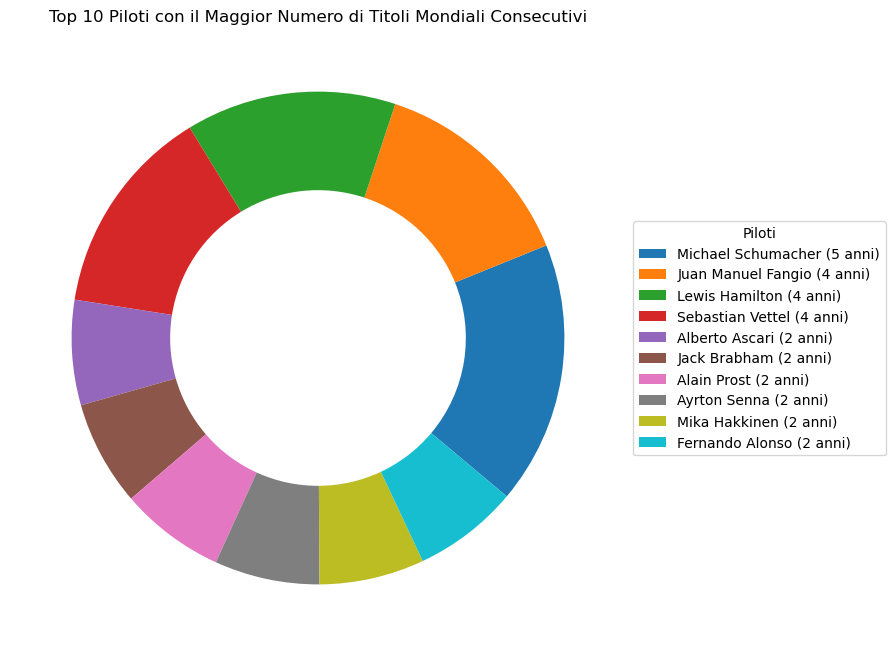

In [8]:
# Raggruppamento per 'Year' e selezione del pilota con il massimo numero di punti per ogni anno
campioni_Mondo = driveStand.loc[driveStand.groupby('Year')['PTS'].idxmax()]

# Calcolo delle serie di vittorie consecutive per ogni pilota
campioni_Serie_Titoli = {}
for pilota in campioni_Mondo['Driver'].unique():
    # Filtraggio per il pilota attuale
    pilota_Anni = campioni_Mondo[campioni_Mondo['Driver'] == pilota]['Year'].sort_values().to_list()
    
    # Calcolo del massimo numero di anni consecutivi
    max_Serie = 0
    serie_Corrente = 0
    anno_Prec = None
    for anno in pilota_Anni:
        if anno_Prec is None or anno == anno_Prec + 1:
            serie_Corrente += 1
        else:
            max_Serie = max(max_Serie, serie_Corrente)
            serie_Corrente = 1
        anno_Prec = anno
    max_Serie = max(max_Serie, serie_Corrente)
    
    campioni_Serie_Titoli[pilota] = max_Serie

# Ordinamento dei piloti per il massimo numero di titoli consecutivi e selezione dei top 10
top_10_Piloti = dict(sorted(campioni_Serie_Titoli.items(), key=lambda item: item[1], reverse=True)[:10])

# Creazione del grafico ad anello
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Impostazione dei dati per il grafico
dati = list(top_10_Piloti.values())
etichette = [f"{driver} ({streak} anni)" for driver, streak in top_10_Piloti.items()]

# Creazione del grafico ad anello
spicchi, testi = ax.pie(dati, wedgeprops=dict(width=0.4), startangle=-40)

# Aggiungi le etichette
plt.legend(spicchi, etichette, title="Piloti", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Top 10 Piloti con il Maggior Numero di Titoli Mondiali Consecutivi")
plt.show()